<a href="https://colab.research.google.com/github/gtbnhyujmj/Auto_Shorts_Maker/blob/main/Make_Text_PNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 安裝中文字體

In [7]:
# 安裝中文字體（在 Colab 上跑這行）
!apt-get -y install fonts-noto-cjk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


# 載入套件

In [8]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Cell 3：設定參數（你只需改這一格）

In [9]:
# ✅ 設定要輸出的文字與樣式

params = {
    "text": "你好，世界！right / top",
    "image_size": (1080, 1920),
    "font_path": "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
    "font_size": 72,
    "text_color": (0, 0, 0, 255),            # 黑色
    "shadow": True,
    "shadow_offset": (4, 4),
    "shadow_color": (0, 0, 0, 128),              # 黑色半透明
    "stroke_width": 2,
    "stroke_fill": (0, 0, 0, 255),               # 黑色描邊
    "gradient": False,
    "position": ("right", "top"),                 # x/y: 'left', 'center', 'right' / 'top', 'center', 'bottom'
    "output_path": "output.png"
}

# Cell 4：輔助工具函式（位置解析）

In [10]:
# 控制文字最後會呈現在1080x1920畫布的哪個位置

def resolve_position(axis_mode, axis_len, content_len):
    if axis_mode == 'left' or axis_mode == 'top':
        return 0
    elif axis_mode == 'center':
        return (axis_len - content_len) // 2
    elif axis_mode == 'right' or axis_mode == 'bottom':
        return axis_len - content_len
    elif isinstance(axis_mode, int):
        return axis_mode
    else:
        raise ValueError("Invalid position value: " + str(axis_mode))

# Cell 5：主函式 draw_text_image()

In [11]:
def draw_text_image(params):
    # 建立空畫布
    width, height = params["image_size"]
    image = Image.new("RGBA", (width, height), (255, 255, 255, 0))
    draw = ImageDraw.Draw(image)

    # 載入字體
    font = ImageFont.truetype(params["font_path"], params["font_size"])

    # 測量文字尺寸
    text_bbox = draw.textbbox((0, 0), params["text"], font=font, stroke_width=params["stroke_width"])
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # 計算位置
    x = resolve_position(params["position"][0], width, text_width)
    y = resolve_position(params["position"][1], height, text_height)

    # 陰影
    if params["shadow"]:
        draw.text(
            (x + params["shadow_offset"][0], y + params["shadow_offset"][1]),
            params["text"],
            font=font,
            fill=params["shadow_color"],
            stroke_width=params["stroke_width"],
            stroke_fill=params["stroke_fill"],
        )

    # 漸層（可選）
    if params["gradient"]:
        gradient_layer = Image.new("RGBA", (width, height), (255, 255, 255, 0))
        grad_draw = ImageDraw.Draw(gradient_layer)
        for i in range(text_height):
            color = (
                int(params["text_color"][0] * (1 - i / text_height)),
                int(params["text_color"][1] * (1 - i / text_height)),
                int(params["text_color"][2] * (1 - i / text_height)),
                params["text_color"][3]
            )
            grad_draw.text((x, y + i), params["text"], font=font, fill=color)
        image = Image.alpha_composite(image, gradient_layer)
    else:
        # 主文字
        draw.text(
            (x, y),
            params["text"],
            font=font,
            fill=params["text_color"],
            stroke_width=params["stroke_width"],
            stroke_fill=params["stroke_fill"],
        )

    # 儲存
    image.save(params["output_path"], "PNG")
    print(f"✅ 圖片已儲存至：{params['output_path']}")
    return image

# Cell 6：執行產生圖片

✅ 圖片已儲存至：output.png


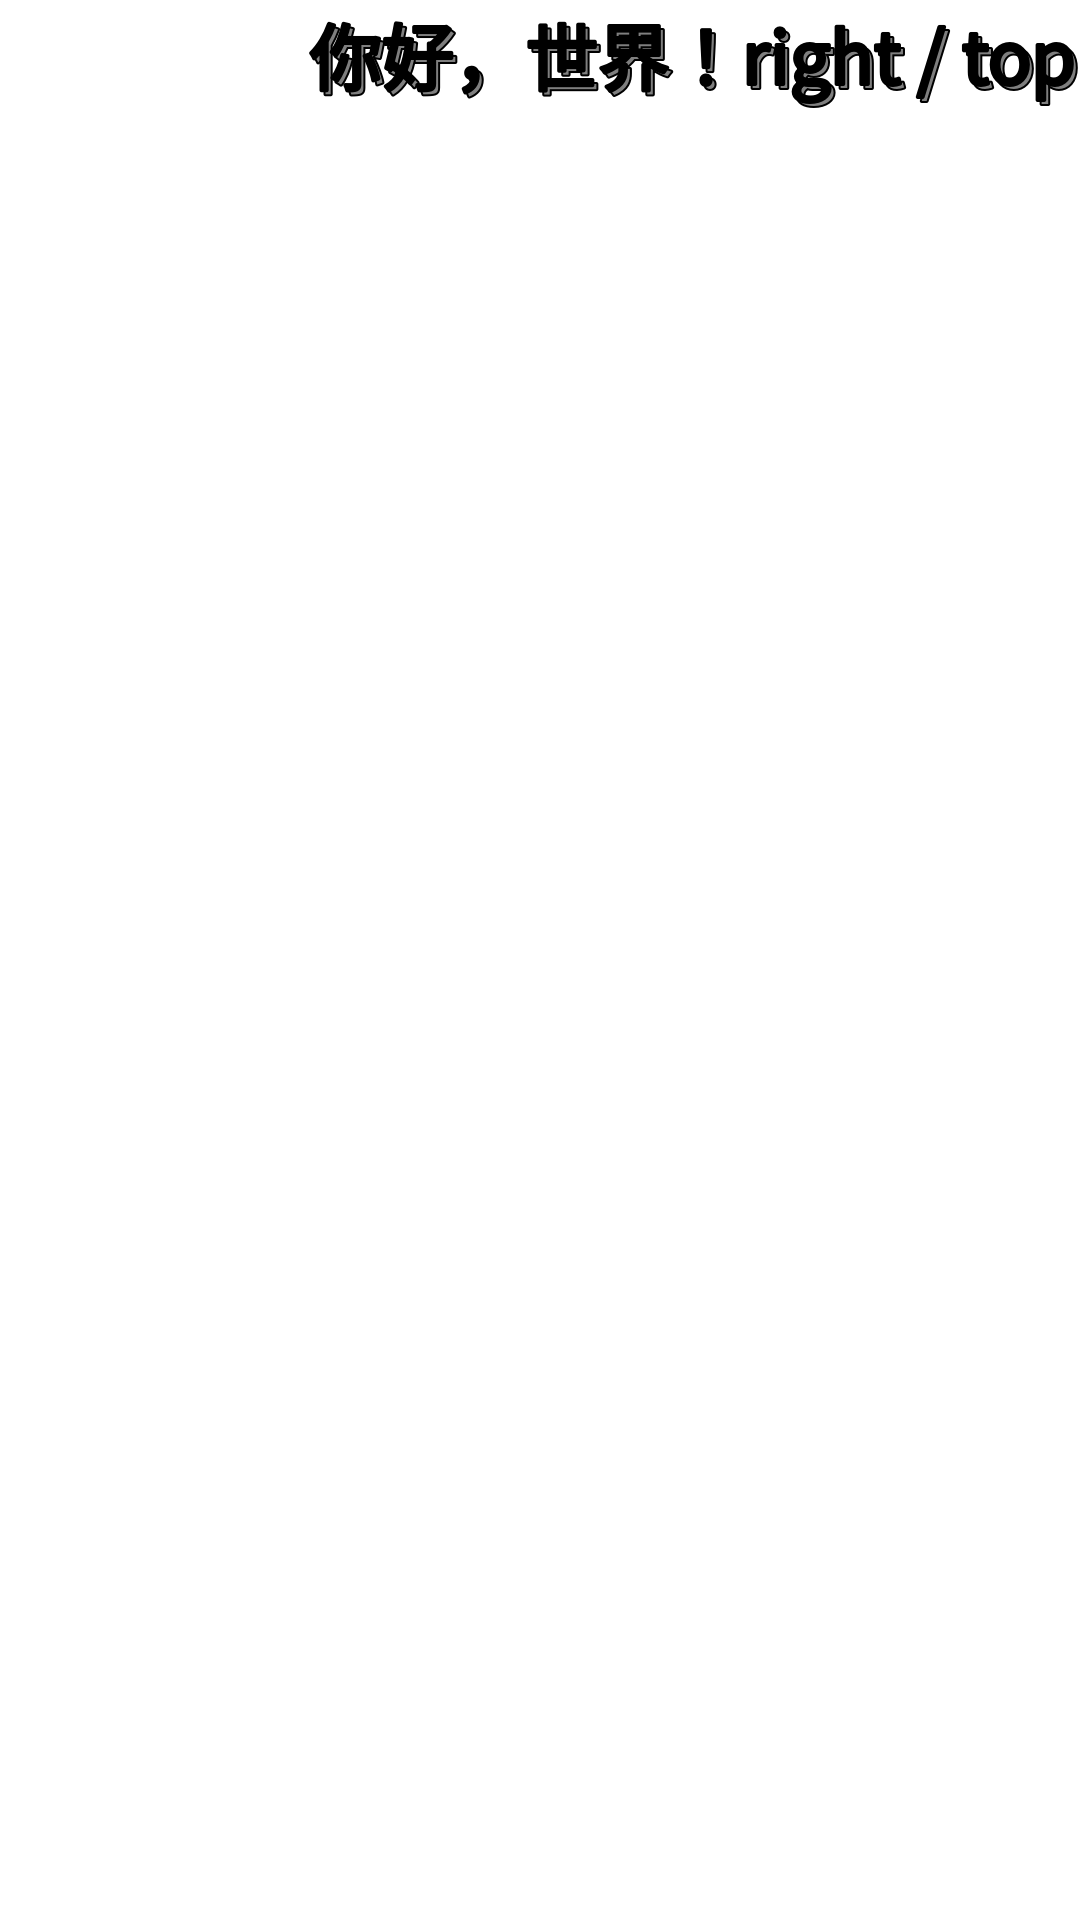

In [12]:
# ✅ 執行主函式來產生圖片
draw_text_image(params)

# draw_text_image